In [120]:
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.utils import np_utils
from scipy import misc

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 5
#nb_classes = 447
nb_epoches = 3
validation_split = 10.0

img_rows = 200
img_cols = 200
img_channels = 3

In [78]:
def VGG_16(classes=1000,weights_path=None):
    model = Sequential()
    #model.add(ZeroPadding2D((1,1),input_shape=(3,224,224)))
    model.add(Convolution2D(64, 3, 3, activation='relu',input_shape=(3,256,256)))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, 3, 3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation='softmax'))
    
    if weights_path:
        model.load_weights(weights_path)

    return model


In [79]:
def fetch_whale_face(whale, dim_ordering='tf'):
    # returns the image for a given whale picture
    faces_dir = "faces/"
    img_path = faces_dir + "w_" + str(whale) + ".jpg"
    img = misc.imread(img_path)
    if dim_ordering != 'tf':
        img = np.transpose(img, (2, 0, 1))
    return img

In [80]:
with open("training/train.csv") as training_data:
    training_data_contents = training_data.readlines()[1:]
training_data_contents = np.array([entry.strip().split(',') for entry in training_data_contents])

In [81]:
int(training_data_contents[3][0][2:-4])

1003

In [82]:
int(training_data_contents[3][1][6:])

48490

In [83]:
x_raw = np.array([int(entry[0][2:-4]) for entry in training_data_contents])
y_raw = np.array([int(entry[1][6:]) for entry in training_data_contents])

In [84]:
x_raw[0:10]

array([   1,  100, 1000, 1003, 1004, 1005, 1006, 1007, 1011, 1012])

In [85]:
y_raw[0:10]

array([72820, 66711, 64496, 48490, 70138, 39689, 47734, 36648, 19027, 34798])

In [86]:
x_raw.shape[0]

4543

In [87]:
y_raw[0]

72820

In [88]:
y_raw_class_vector = np.zeros(len(y_raw))
class_vector_map = dict()
class_vector_map_reverse = [-1 for x in xrange(len(y_raw))]
nb_classes = 0
for index in xrange(len(y_raw)):
    whale = y_raw[index]
    if whale not in class_vector_map:
        class_vector_map[whale] = nb_classes
        class_vector_map_reverse[nb_classes] = whale
        nb_classes += 1
    y_raw_class_vector[index] = class_vector_map[whale]

In [89]:
y_raw_class_vector

array([   0.,    1.,    2., ...,   22.,  198.,  422.])

In [90]:
nb_classes

447

In [91]:
class_vector_map_reverse[int(y_raw_class_vector[0])]

72820

In [92]:
Y_raw = np_utils.to_categorical(y_raw_class_vector, nb_classes)

In [93]:
Y_raw.shape

(4543, 447)

In [94]:
img = fetch_whale_face(1, 't')

In [95]:
img.shape

(3, 256, 256)

In [96]:
# ch, r, c to r, c, ch
img = np.transpose(img, (1, 2, 0))
img.shape

(256, 256, 3)

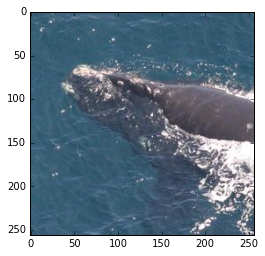

In [97]:
plt.imshow(img)

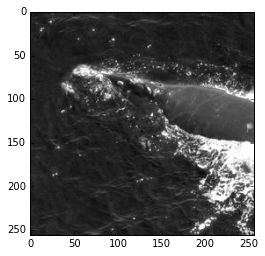

In [98]:
red = img[:,:,0]
plt.imshow(red, cmap=plt.cm.gray)

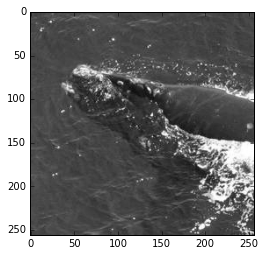

In [99]:
green = img[:,:,1]
plt.imshow(green, cmap=plt.cm.gray)

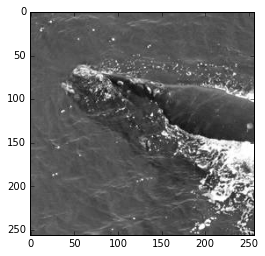

In [100]:
blue = img[:,:,2]
plt.imshow(blue, cmap=plt.cm.gray)

In [101]:
X_raw = np.array([fetch_whale_face(whale,'t') for whale in x_raw])

In [102]:
X_raw.shape

(4543, 3, 256, 256)

In [103]:
X_raw = X_raw.astype("float32")

In [104]:
X_raw /= 255

In [105]:
X_raw[0]

array([[[ 0.22352941,  0.20784314,  0.19215687, ...,  0.24705882,
          0.23921569,  0.22745098],
        [ 0.23137255,  0.21960784,  0.20784314, ...,  0.23529412,
          0.23529412,  0.22745098],
        [ 0.22745098,  0.23137255,  0.23137255, ...,  0.22352941,
          0.23137255,  0.22745098],
        ..., 
        [ 0.23137255,  0.22745098,  0.22745098, ...,  0.80784315,
          0.87843138,  0.89019608],
        [ 0.22745098,  0.22745098,  0.22745098, ...,  0.43529412,
          0.66274512,  0.67450982],
        [ 0.22352941,  0.22745098,  0.22745098, ...,  0.30588236,
          0.3882353 ,  0.51764709]],

       [[ 0.37254903,  0.35686275,  0.34117648, ...,  0.3882353 ,
          0.3882353 ,  0.3764706 ],
        [ 0.38039216,  0.36862746,  0.35686275, ...,  0.3764706 ,
          0.38431373,  0.3764706 ],
        [ 0.3764706 ,  0.38039216,  0.38039216, ...,  0.36470589,
          0.38039216,  0.3764706 ],
        ..., 
        [ 0.37254903,  0.36862746,  0.36862746, ...,

In [106]:
#model = VGG_16(nb_classes)
model = VGG_16(447)
sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

In [108]:
train_total = X_raw.shape[0]
train_total

4543

In [112]:
test_size = int(X_raw.shape[0] * validation_split/100.0)
test_size

454

In [114]:
train_size = X_raw.shape[0]-test_size
train_size

4089

In [115]:
X_train = X_raw[:train_size]
X_test = X_raw[train_size:]
Y_train = Y_raw[:train_size]
Y_test = Y_raw[train_size:]

In [117]:
Y_train.shape

(4089, 447)

In [ ]:
model.fit(X_train, Y_train, batch_size=batch_size, nb_epoch=nb_epoches, show_accuracy=True, verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, show_accuracy=True, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 4089 samples, validate on 454 samples
Epoch 1/3
  25/4089 [..............................] - ETA: 15519s - loss: 14.1666 - acc: 0.0000